In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns

In [18]:
training_data = pd.DataFrame(data={"x":np.random.normal(loc=65,scale=5,size=1000)})

In [19]:
training_data

x
0    71.539122
1    61.266940
2    63.501236
3    63.177512
4    72.458741
..         ...
995  67.047133
996  70.801701
997  68.594284
998  71.610450
999  67.982459

[1000 rows x 1 columns]

(array([  1.,   0.,   0.,   1.,   3.,  13.,  31.,  54.,  91., 117., 145.,
        162., 122., 119.,  64.,  49.,  15.,   9.,   2.,   2.]),
 array([43.82040574, 45.70251742, 47.58462911, 49.46674079, 51.34885247,
        53.23096416, 55.11307584, 56.99518752, 58.87729921, 60.75941089,
        62.64152257, 64.52363426, 66.40574594, 68.28785762, 70.16996931,
        72.05208099, 73.93419267, 75.81630436, 77.69841604, 79.58052772,
        81.46263941]),
 <BarContainer object of 20 artists>)

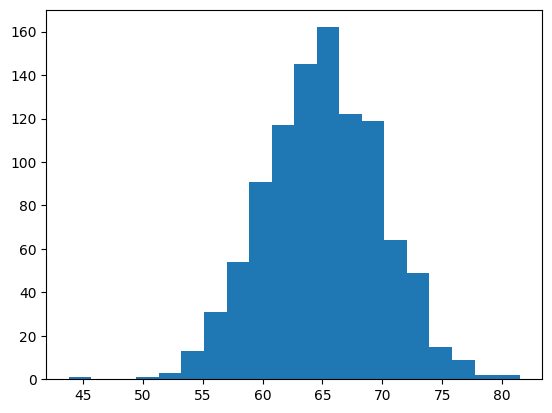

In [20]:
plt.hist(training_data, bins=20)

In [21]:
def negative_log_likelihood(mu, sigma, data):
    n = len(data)
    nll = (n / 2) * np.log(2 * np.pi * sigma**2) + (1 / (2 * sigma**2)) * np.sum((data - mu)**2)
    return nll

In [22]:
mu_values = np.linspace(63, 67, 200)
sigma_values = np.linspace(4, 6, 200)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

In [23]:
nll_values = np.zeros_like(mu_grid)

In [24]:
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        nll_values[i, j] = negative_log_likelihood(mu_grid[i, j], sigma_grid[i, j], training_data)

/home/aiml-machine/BCEECE0312_programs/MLE_demo/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_20001/1097364582.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nll_values[i, j] = negative_log_likelihood(mu_grid[i, j], sigma_grid[i, j], training_data)


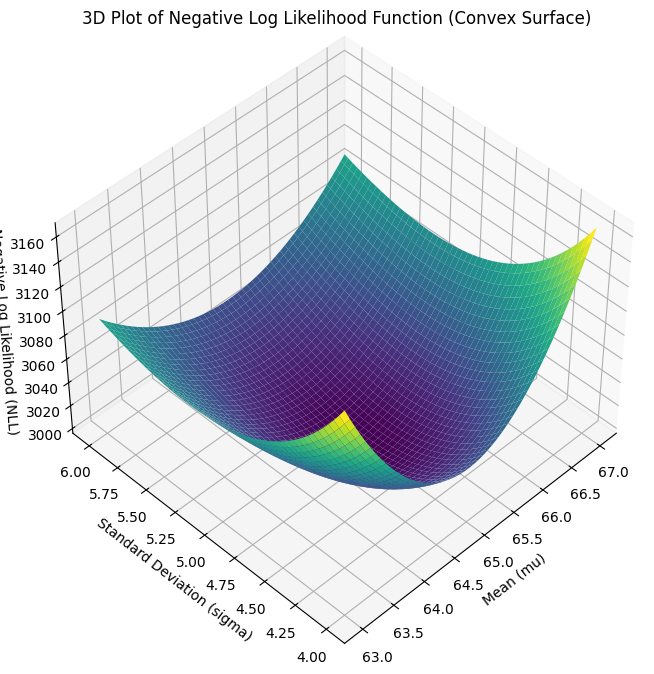

In [25]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mu_grid, sigma_grid, nll_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Mean (mu)')
ax.set_ylabel('Standard Deviation (sigma)')
ax.set_zlabel('Negative Log Likelihood (NLL)')
ax.set_title('3D Plot of Negative Log Likelihood Function (Convex Surface)')

# Adjusting the view angle to better visualize the convexity
ax.view_init(elev=45, azim=225)

plt.show()

In [26]:
def del_by_del_nll(mu_initial,sigma_initial):

    del_by_del_mu = -np.mean(training_data - mu_initial)/sigma_initial**2
    del_by_del_sigma = (1/sigma_initial) - np.mean(training_data - mu_initial)**2/sigma_initial**3

    return [del_by_del_mu,del_by_del_sigma]

In [27]:
def nll(mu,sigma):

    log_pdf = s.norm.logpdf(training_data,mu,sigma)
    return -np.mean(log_pdf)

In [28]:
#epochs = 150
epsilon = 10**(-4)
epoch_counter = 0
mu_initial = 5
sigma_initial = 1
tol = 10**(-5)

while True:

    initial_gradients = del_by_del_nll(mu_initial,sigma_initial)

    mu_final = mu_initial - (epsilon * initial_gradients[0])
    sigma_final = sigma_initial - (epsilon * initial_gradients[1])

    nll_initial_value = nll(mu_initial,sigma_initial)
    nll_final_value = nll(mu_final,sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    mu_initial = mu_final
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 1812.6138948342748
Epoch # 2, NLL Value = 980.7109488483924
Epoch # 3, NLL Value = 803.1496606158444
Epoch # 4, NLL Value = 701.0359940188168
Epoch # 5, NLL Value = 631.5830599360929
Epoch # 6, NLL Value = 580.1059355828055
Epoch # 7, NLL Value = 539.8590336230748
Epoch # 8, NLL Value = 507.21492941861396
Epoch # 9, NLL Value = 480.0144827520327
Epoch # 10, NLL Value = 456.87696196473854
Epoch # 11, NLL Value = 436.87074297115356
Epoch # 12, NLL Value = 419.340397984717
Epoch # 13, NLL Value = 403.8090786785958
Epoch # 14, NLL Value = 389.92016350818477
Epoch # 15, NLL Value = 377.4007193460926
Epoch # 16, NLL Value = 366.03772495557183
Epoch # 17, NLL Value = 355.6620883719014
Epoch # 18, NLL Value = 346.13760062514535
Epoch # 19, NLL Value = 337.35311518104874
Epoch # 20, NLL Value = 329.21689326570817
Epoch # 21, NLL Value = 321.6524384963138
Epoch # 22, NLL Value = 314.5953773899577
Epoch # 23, NLL Value = 307.9910882704329
Epoch # 24, NLL Value = 301.7928748

In [42]:
mu_final

np.float64(9.087717230168339)

In [43]:
sigma_final

np.float64(21.029197560001656)

/tmp/ipykernel_20001/913442565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=training_data["x"],bins=10,fit=s.norm,kde=False)


<Axes: xlabel='x'>

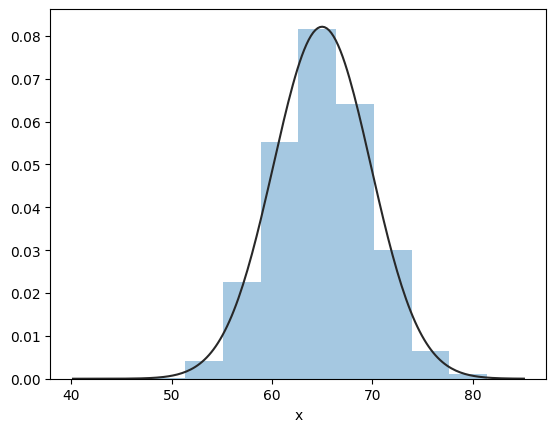

In [31]:
sns.distplot(a=training_data["x"],bins=10,fit=s.norm,kde=False)